In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as pjoin
from os.path import isfile
from os import listdir
from utils import *
import sklearn as sk 
from scipy.spatial.distance import jensenshannon
from scipy import stats
from model_training import *


In [2]:
general_data_folder = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\Master's Thesis\\Data"
muon_folder = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\Master's Thesis\\Data\\muon"
data_folder = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\Master's Thesis\\Data\\data"
neutrino_folder = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\Master's Thesis\\Data\\neutrino"
livetimes_file = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\\Master's Thesis\\Data\\livetimes.csv"
distribution_plot_folder = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\Master's Thesis\\Plots\\distributions"
proportion_plot_folder = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\Master's Thesis\\Plots\\proportions"
general_plot_folder = "C:\\Users\\lovat\\Desktop\\MyFiles\\Unif\Master's Thesis\\Plots\\general"

X_raw = getData(muon_folder, data_folder, neutrino_folder, livetimes_file)
train_index = np.arange(len(X_raw.index))
test_index = np.array([0, 1])
X, X_, Y, Y_, W, W_ = prepareData(X_raw, train_index, test_index)
x, _, y, _, w, _ = setupDataframes(X, X_, Y, Y_, W, W_)

print(len(X.index), "observations")
print(len(X[Y == 1].index), "neutrinos")
print(len(X[Y == 0].index), "muons")

types = y.to_numpy()


c:\Users\lovat\Desktop\MyFiles\Unif\Master's Thesis\Codes\model_training.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_muon["type"] = 0.0
c:\Users\lovat\Desktop\MyFiles\Unif\Master's Thesis\Codes\model_training.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numu["type"] = 1.0


Dataframe composed of 772042 samples
[1.09890110e-03 1.09890110e-03 1.09890110e-03 ... 1.78004713e-11
 3.13375851e-11 1.40963134e-11]
[1.09890110e-03 1.09890110e-03 1.09890110e-03 ... 3.68187189e-11
 2.67812363e-11 3.07994153e-11]
772042 observations
49600 neutrinos
722442 muons


params = [df_mu, df_nu, w_mu, w_nu]
alphas_0 = np.ones(len(df_mu.columns))
alphas_0 /= np.linalg.norm(alphas_0)
initial_dist = distinguishingDistance(alphas_0, params)
print(initial_dist)

alphas = boundaryMax(distinguishingDistance, alphas_0, df = None, max_step = 20, threshold = 1e-8, dt = 1e-1, params = params)
print(alphas)

In [ ]:

optimal_weights = getOptimalAxis(x, y, w)
x["optimal_feature"] = computeOptimalFeature(x, x.columns, optimal_weights)
x["optimal_feature"] = (x["optimal_feature"]-x["optimal_feature"].mean())/x["optimal_feature"].std()

In [ ]:
getProportions(x, w, types, proportion_plot_folder)

In [3]:
dic, JSscores = getJensenShannonScores(x, w, types, distribution_plot_folder)
MIscores = getMIScores(x, y, 5)
corrMatrix = getCorrelationMatrix(x, w, general_plot_folder)
JSfile = pjoin(general_data_folder, "JS.csv")
MIfile = pjoin(general_data_folder, "MI.csv")
Corrfile = pjoin(general_data_folder, "Corr.csv")
np.savetxt(Corrfile, corrMatrix, delimiter=",")
np.savetxt(JSfile, JSscores, delimiter=",")
np.savetxt(MIfile, MIscores, delimiter=",")

n_trig_hits done
n_trig_doms done
n_trig_lines done
coc done
tot done
max_hit_tot done
z_early done
z_late done
z_early_qweighted done
z_late_qweighted done
delta_z_earlylate done
delta_z_firstlast done
delta_z_earlylate_qweighted done
delta_z_firstlast_qweighted done
distance_earlylate done
distance_earlylate_qweighted done
distance_firstlast done
distance_firstlast_qweighted done
charge_ratio_abovefirsthit done
charge_ratio_early done
charge_ratio_earlylate done
charge_ratio_first done
charge_ratio_firstlast done
charge_ratio_veto1 done
charge_ratio_veto2 done
charge_ratio_earlyveto1 done
charge_ratio_earlyveto2 done
charge_ratio_side done
charge_ratio_earlyside done
cher_nhits done
track_quality done
track_energy done
track_beta0 done
track_beta1 done
track_nhitsJGandalf done
track_npe_mip_total done
track_length done
track_x done
track_y done
track_z done
bestmuon_dx done
bestmuon_dy done
bestmuon_dz done
bestmuon_distance_to_closestdom done


In [4]:
JSfile = pjoin(general_data_folder, "JS.csv")
MIfile = pjoin(general_data_folder, "MI.csv")
Corrfile = pjoin(general_data_folder, "Corr.csv")
JSscores = np.genfromtxt(JSfile, delimiter=",", skip_header=False)
MIscores = np.genfromtxt(MIfile, delimiter=",", skip_header=False)
corrMatrix = np.genfromtxt(Corrfile, delimiter=",", skip_header=False)

In [5]:
features = x.columns.to_numpy()
print(len(features))
print(len(JSscores))
print(len(MIscores))
print(corrMatrix.shape)

44
44
44
(44, 44)


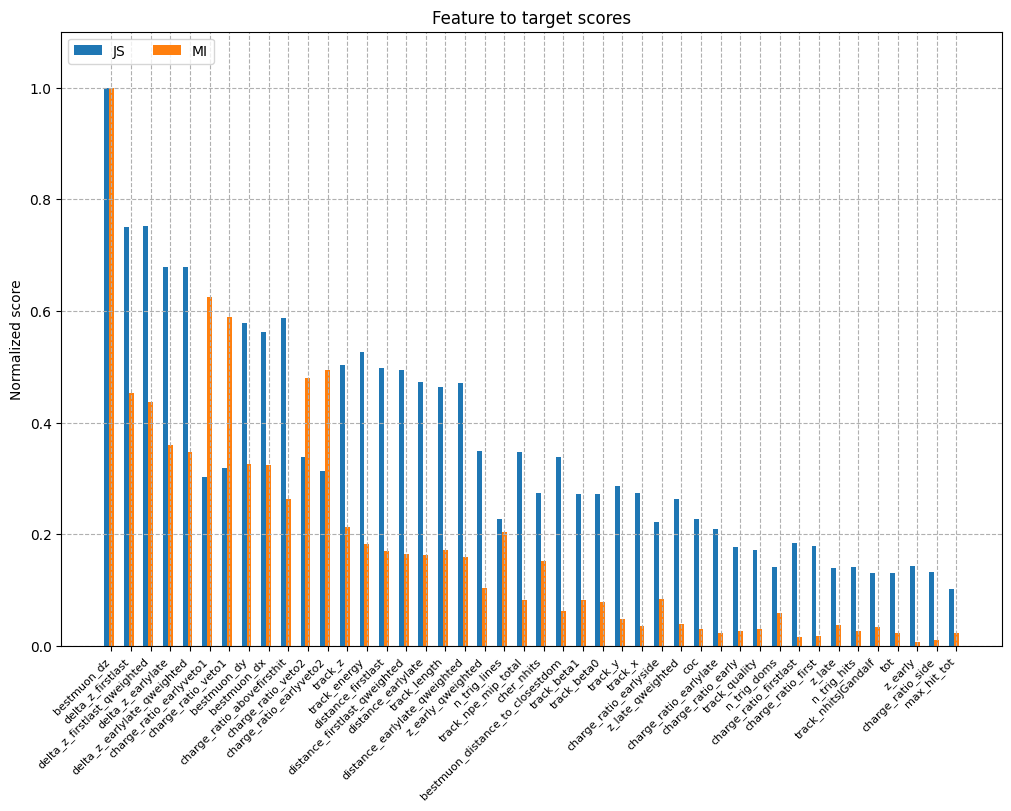

In [6]:
abscisses = np.arange(len(features))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,8))

allScores = [("JS", JSscores/np.max(JSscores)), ("MI", MIscores/np.max(MIscores))]
meanScore = (allScores[0][1] + allScores[1][1]) / 2
sorted_indices = np.flip(np.argsort(meanScore))

for attribute, measurement in allScores:
    offset = width * multiplier
    rects = ax.bar(abscisses + offset, measurement[sorted_indices], width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized score')
ax.set_title('Feature to target scores')
ax.set_xticks(abscisses + width, features[sorted_indices], rotation=45, ha='right', va='top', fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.1)
plt.grid(linestyle='--')
plot_file = pjoin(general_plot_folder, "score_comp.png")
plt.savefig(plot_file)
plt.show()
plt.close()

In [7]:
selected_features, selected_scores, selected_correlations, selected_N = selectFeatures(features, np.array([JSscores, MIscores]), corrMatrix, 10, correlation_threshold=0.6)

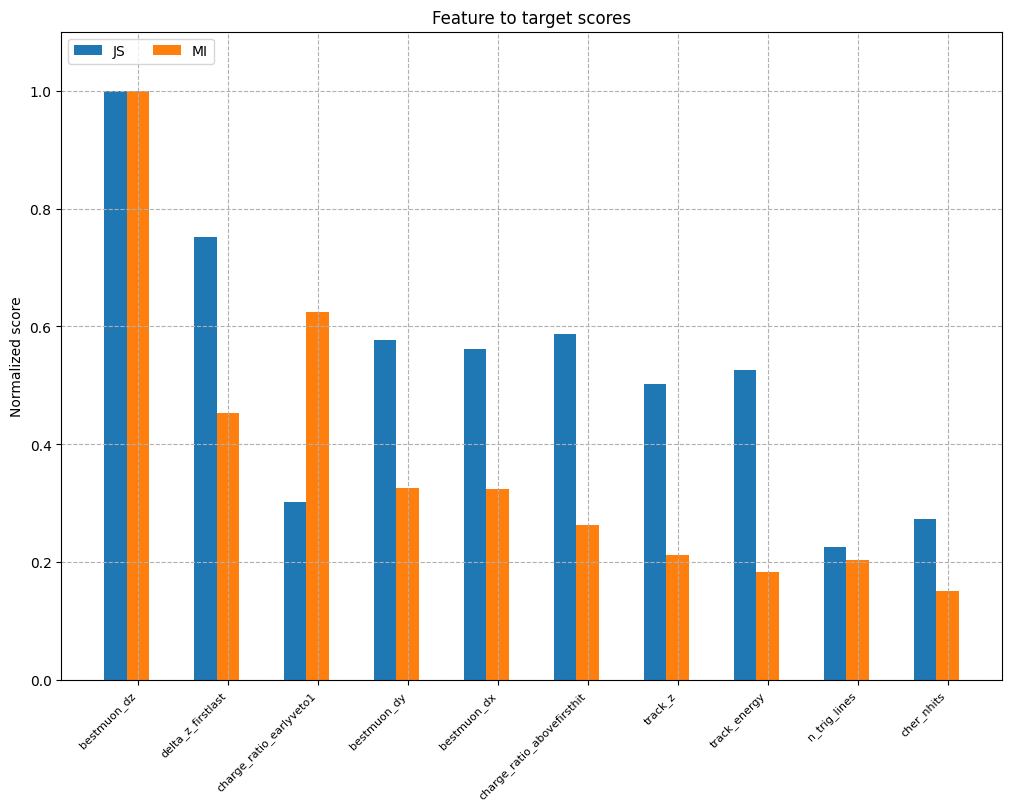

In [10]:
abscisses = np.arange(selected_N)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,8))

allScores = [("JS", selected_scores[0]/np.max(JSscores)), ("MI", selected_scores[1]/np.max(MIscores))]

for attribute, measurement in allScores:
    offset = width * multiplier
    rects = ax.bar(abscisses + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized score')
ax.set_title('Feature to target scores')
ax.set_xticks(abscisses + width, selected_features, rotation=45, ha='right', va='top', fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.1)
plt.grid(linestyle='--')
plot_file = pjoin(general_plot_folder, "score_comp_selected.png")
plt.savefig(plot_file)
plt.show()
plt.close()

In [13]:
print(selected_correlations)
fig, ax = plt.subplots(figsize=(7, 7))
cax = ax.matshow(np.abs(selected_correlations), vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,selected_N,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
a = 20.0
ax.set_xticklabels(selected_features, rotation=90-a, ha='left', va='bottom', fontsize = 8)
ax.set_yticklabels(selected_features, rotation=a, ha='right', va='top', fontsize = 8)
plot_file = pjoin(general_plot_folder, "Correlations_abs_selected.png")
fig.tight_layout()
plt.savefig(plot_file)
plt.close()

[[ 1.00000000e+00 -5.90194640e-01 -1.42883827e-01  4.73509007e-04
  -6.56126413e-04  2.96532768e-01 -3.94308969e-01 -7.52396203e-02
   1.94395640e-01 -1.90873406e-01]
 [-5.90194640e-01  1.00000000e+00  1.88786820e-02 -6.06368279e-03
   2.94808702e-03 -3.94173985e-01  4.71155996e-01  1.99215967e-01
   2.30577780e-01  4.11479138e-01]
 [-1.42883827e-01  1.88786820e-02  1.00000000e+00  6.07011254e-03
  -7.53288950e-03  1.07135605e-01  5.52195926e-01 -5.97892341e-02
  -4.99390763e-02 -9.89920349e-02]
 [ 4.73509007e-04 -6.06368279e-03  6.07011254e-03  1.00000000e+00
  -3.78931433e-04 -2.22425545e-02  1.07159846e-02 -1.58112358e-03
   7.93996815e-03  5.97935617e-03]
 [-6.56126413e-04  2.94808702e-03 -7.53288950e-03 -3.78931433e-04
   1.00000000e+00 -2.33189253e-02 -1.10453257e-02  7.90844326e-03
   1.90782873e-03 -4.46884821e-03]
 [ 2.96532768e-01 -3.94173985e-01  1.07135605e-01 -2.22425545e-02
  -2.33189253e-02  1.00000000e+00 -1.67366818e-01 -7.92397414e-02
  -1.29940150e-01 -2.09366743e-01